In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Initialize the data
positive_points = np.array([ (-2,3), (0,1), (2,-1)])
negative_points = np.array([ (-2,1), (0, -1), (2,-3)])

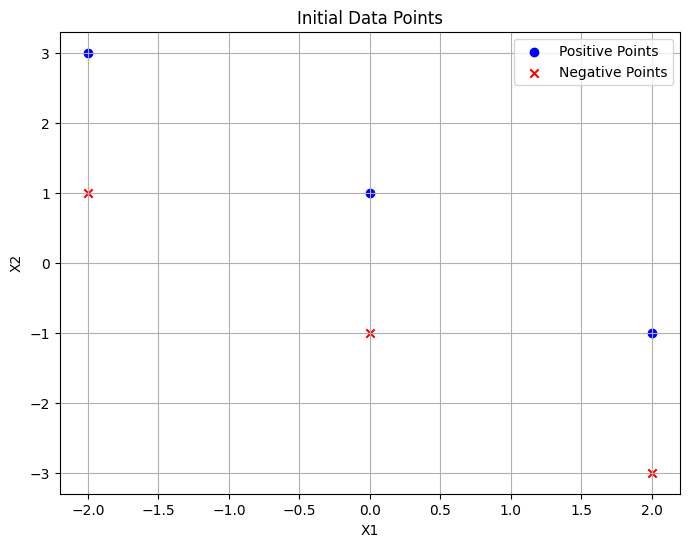

In [ ]:
# Plot the graph
plt.figure(figsize=(8,6)) # graph side
plt.scatter(positive_points[:, 0], positive_points[:, 1], color="blue", marker="o", label="Positive Points")
plt.scatter(negative_points[:,0], negative_points[:, 1], color="red", marker="x", label="Negative Points")
plt.legend(loc="best")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Initial Data Points")
plt.grid(True)
plt.show()


In [10]:
#Combining all points and labels
X = np.vstack((positive_points, negative_points))
y = np.stack([1]* len(positive_points) + [-1]*len((negative_points)))

In [11]:
X

array([[-2,  3],
       [ 0,  1],
       [ 2, -1],
       [-2,  1],
       [ 0, -1],
       [ 2, -3]])

In [12]:
y

array([ 1,  1,  1, -1, -1, -1])

In [41]:
def perceptron(X, y, steps=10):
    theta = np.zeros(X.shape[1])
    theta0 = 0.0

    for t in range(steps):
        # find one misclassified point this epoch and update
        for i, xi in enumerate(X):
            if y[i] * (np.dot(xi, theta) + theta0) <= 0:
                theta += y[i] * xi
                theta0 += y[i]      # accumulate bias, not assign
                break

        # plot once per epoch (after the possible update)
        plot_decision_boundary(theta, theta0, t + 1)

    return theta, theta0


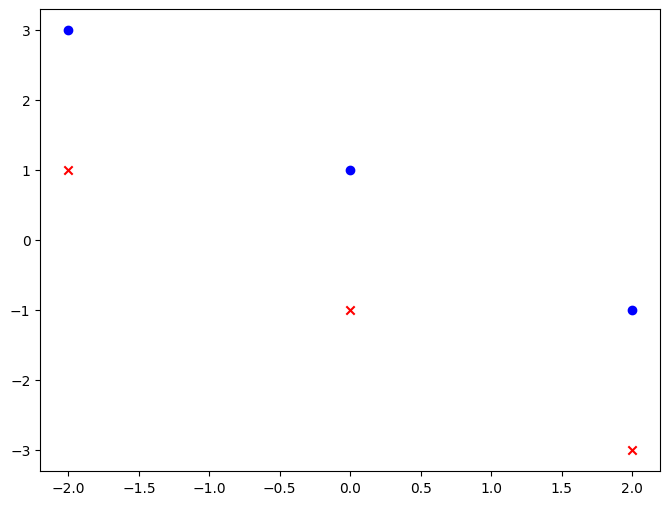

In [42]:
# Plot decision boundary
plt.figure(figsize=(8,6))
plt.scatter(positive_points[:, 0], positive_points[:, 1], color="blue", marker="o", label="Positive Points")
plt.scatter(negative_points[:,0], negative_points[:, 1], color="red", marker="x", label="Negative Points")

# Plot decision 


In [43]:
def plot_decision_boundary(theta, theta0, iteration):
    plt.figure(figsize=(8,6))
    plt.scatter(positive_points[:, 0], positive_points[:, 1],
                color="blue", marker="o", label="Positive Points")
    plt.scatter(negative_points[:, 0], negative_points[:, 1],
                color="red", marker="x", label="Negative Points")
    
    x_values = np.linspace(-3, 3, 2)
    if theta[1] != 0:
        y_values = -(theta[0] * x_values + theta0) / theta[1]
        plt.plot(x_values, y_values, label=f"Iteration {iteration}")
    else:
        x_val = -theta0 / theta[0]
        plt.axvline(x=x_val, label=f"Iteration {iteration}")

    # always apply axes/labels/title and show
    plt.xlim(-3, 3)
    plt.ylim(-4, 4)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.title(f"Decision Boundary at Iteration {iteration}")
    plt.legend()
    plt.grid(True)
    plt.show()


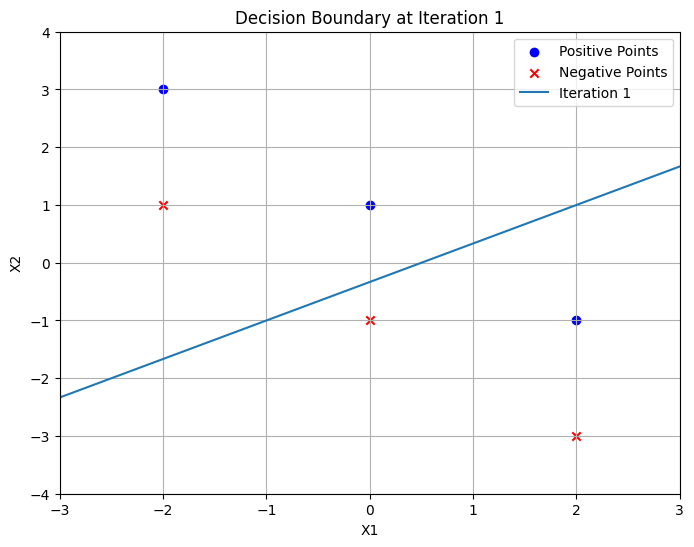

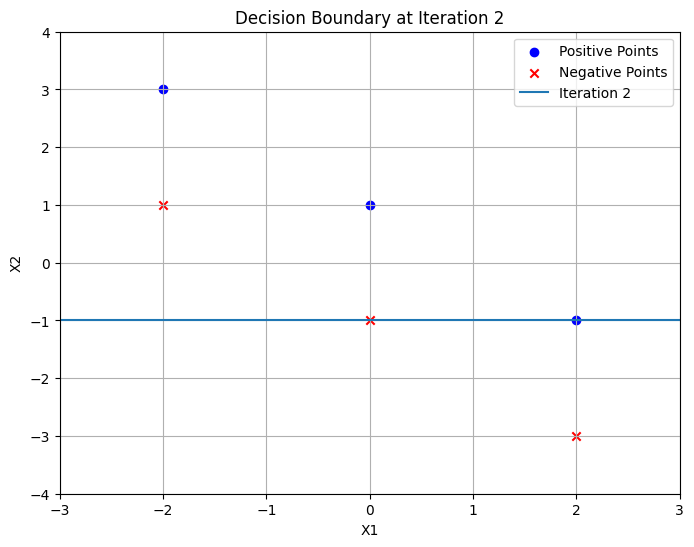

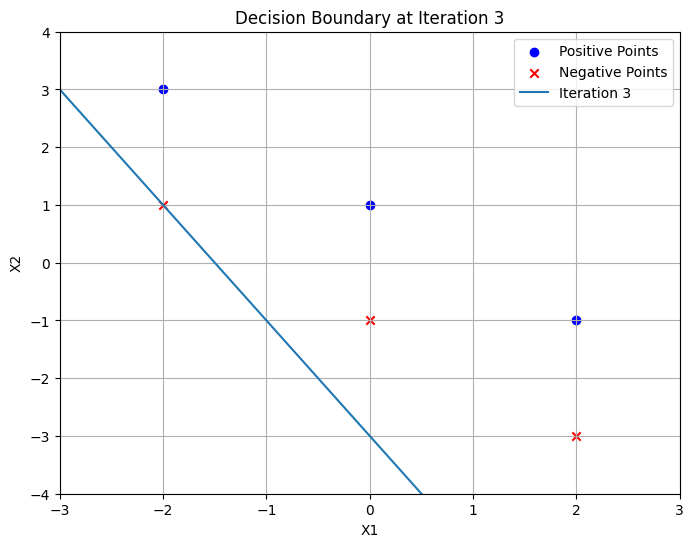

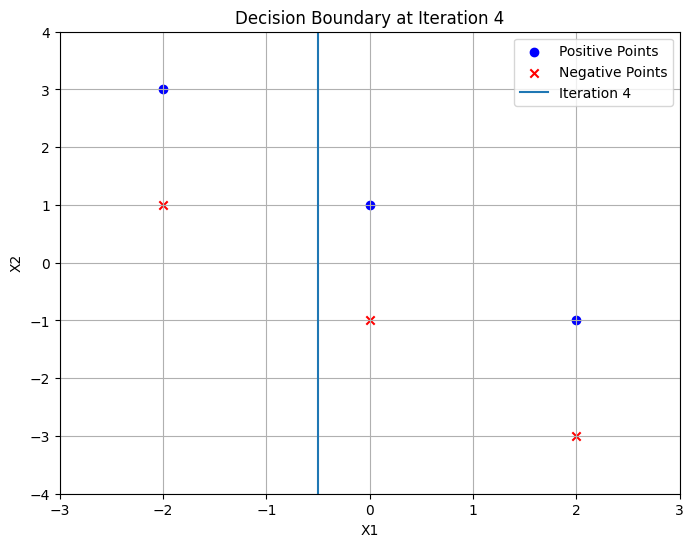

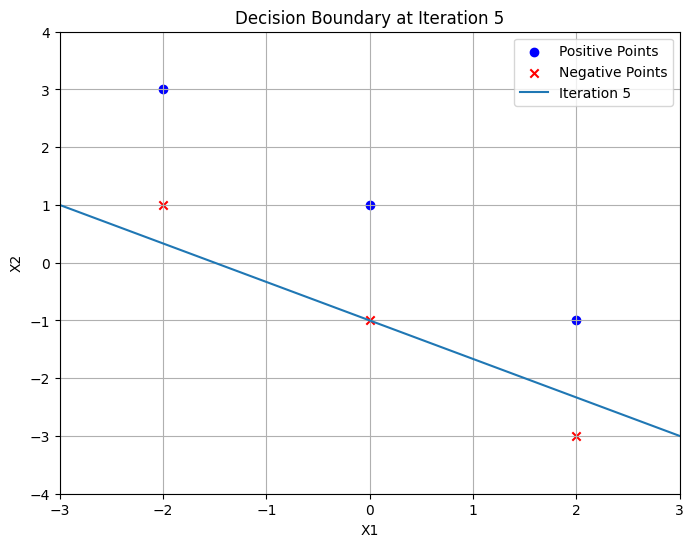

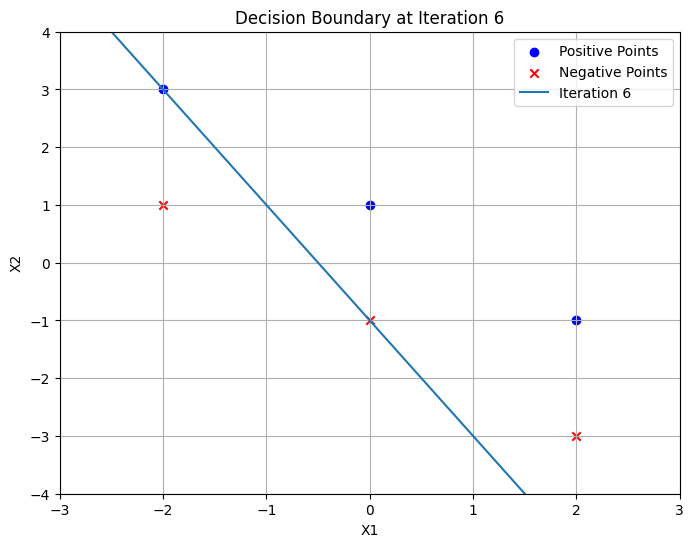

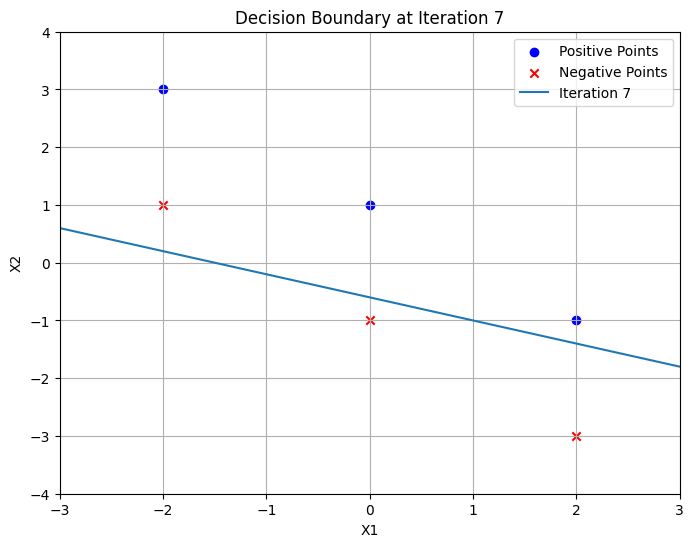

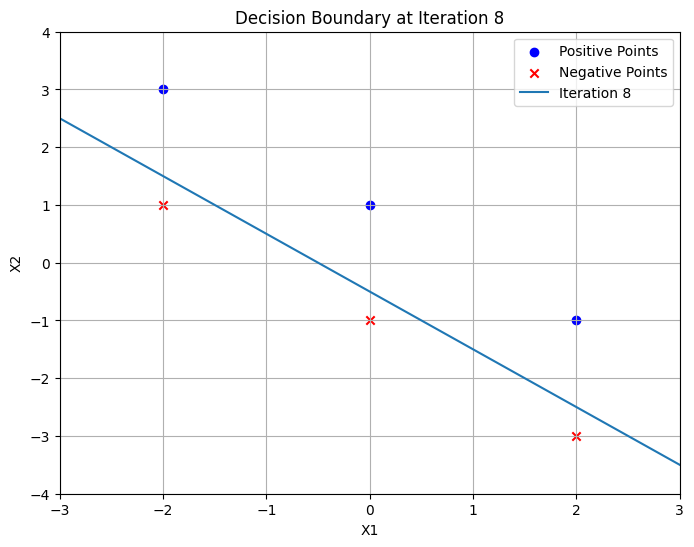

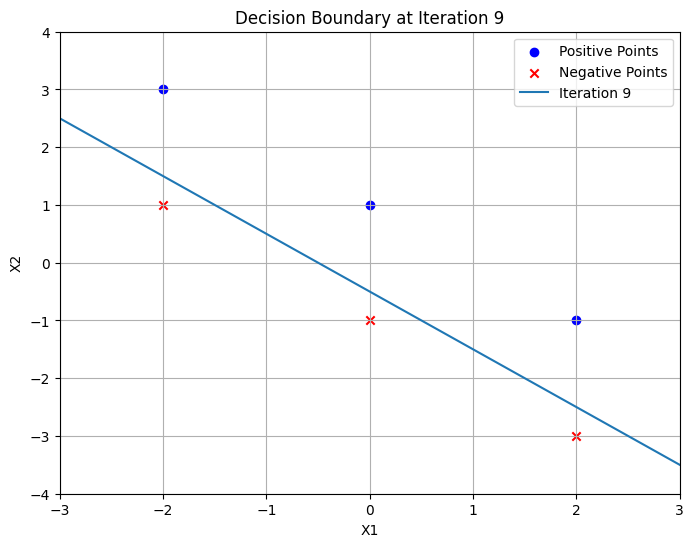

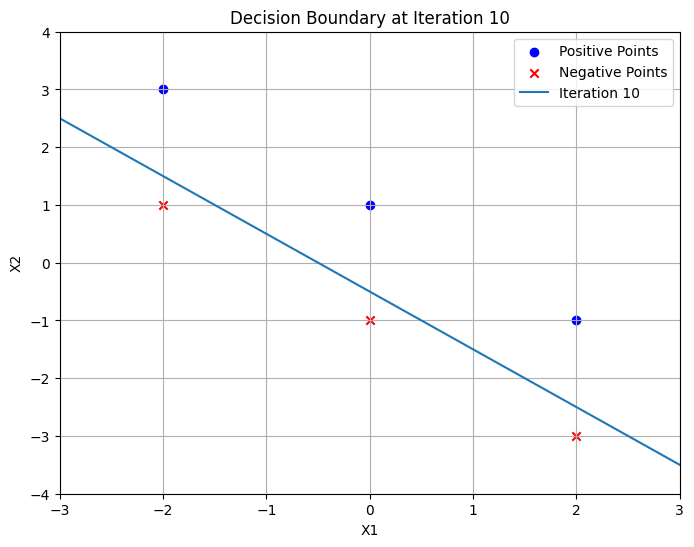

In [44]:
theta_final, theta0_final = perceptron(X, y ,10)